In [6]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

import mpmp.config as cfg
import mpmp.utilities.survival_utilities as su
import mpmp.utilities.plot_utilities as plu

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# set results directory
results_dir = Path(cfg.results_dirs['survival']).resolve()

# load results into a single dataframe
results_df = su.load_survival_results(results_dir)
results_df.rename(columns={'identifier': 'cancer_type'}, inplace=True)
results_df.head()

,cindex,data_type,cancer_type,training_data,signal,seed,fold_no
0,0.60616,train,BRCA,me_450k,shuffled,1,0
1,0.60616,cv,BRCA,me_450k,shuffled,1,0
2,0.58615,test,BRCA,me_450k,shuffled,1,0
3,0.70906,train,BRCA,me_450k,shuffled,1,1
4,0.70906,cv,BRCA,me_450k,shuffled,1,1


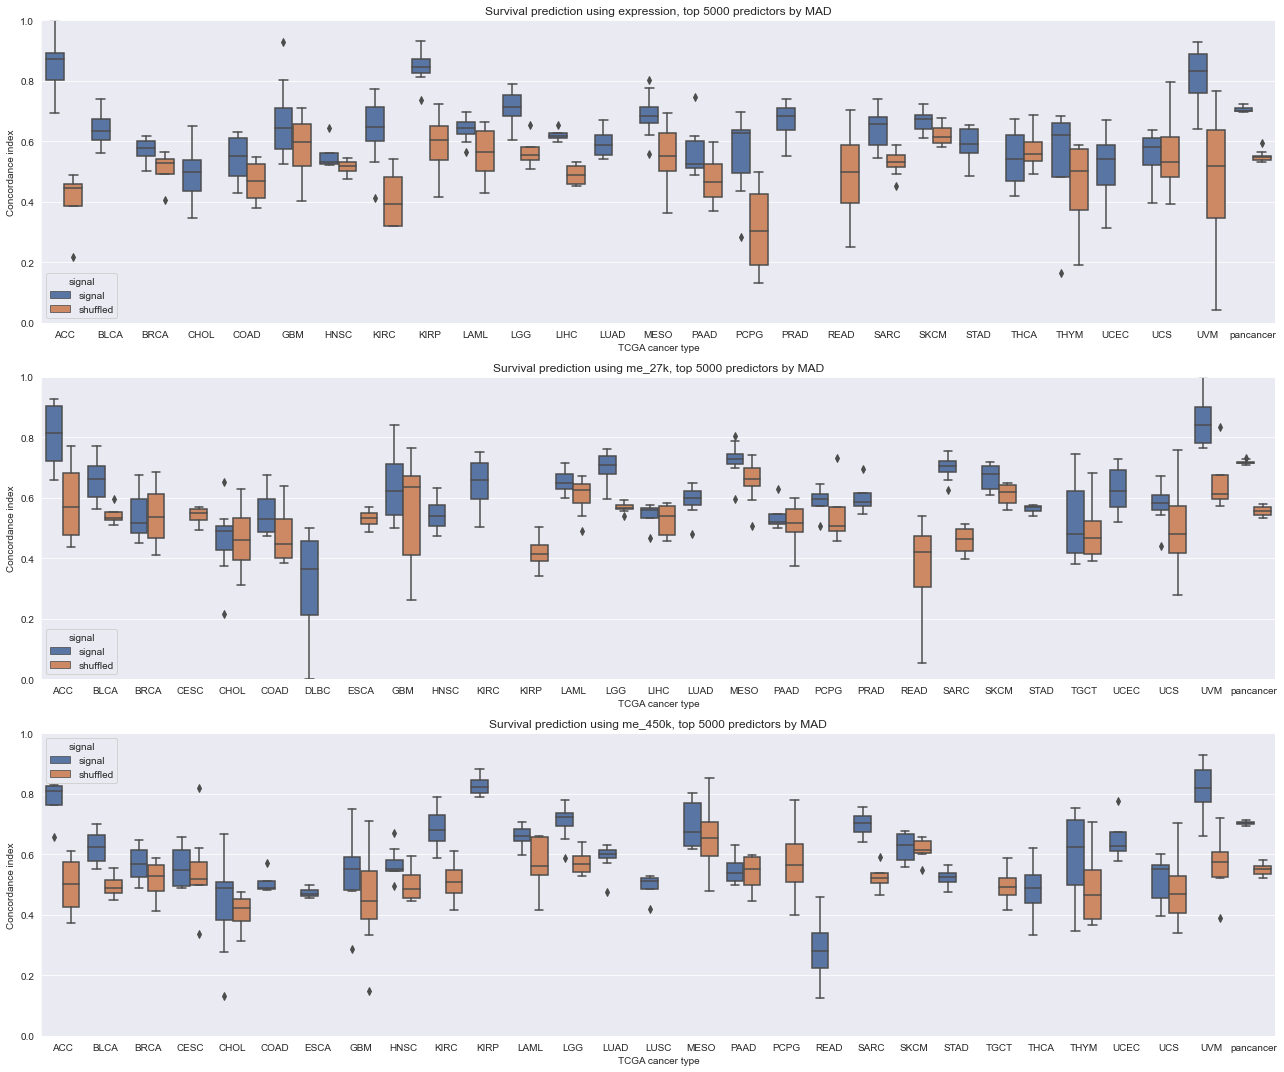

In [23]:
sns.set({'figure.figsize': (18, 15)})
fig, axarr = plt.subplots(3, 1)

for ix, data_type in enumerate(
    results_df.training_data.sort_values().unique()
):
    
    ax = axarr[ix]
    
    filtered_df = results_df[
        (results_df.training_data == data_type) &
        (results_df.data_type == 'test')
    ].copy()

    filtered_df.sort_values(by='cancer_type', inplace=True)

    sns.boxplot(data=filtered_df, x='cancer_type', y='cindex', hue='signal',
                hue_order=['signal', 'shuffled'], ax=ax)
    ax.set_xlabel('TCGA cancer type')
    ax.set_ylabel('Concordance index')
    ax.set_title('Survival prediction using {}, top 5000 predictors by MAD'.format(data_type))
    ax.set_ylim(0.0, 1.0)
    
plt.tight_layout()